<a href="https://colab.research.google.com/github/NdopnnoabasiJames/LinearRegressionModels/blob/main/Linear_%26_Polynomial_Regression_on_Fish_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Target: predict Weight (continuous) from Length1, Length2, Length3, Height, Width and categorical Species.


Cell 1: Imports of the core libraries. RANDOM_SEED ensures reproducible splits and randomized procedures. ColumnTransformer + Pipeline will let us keep preprocessing tidy and avoid data leakage. Warnings suppressed only for clarity in the notebook.

This script imports a powerful and standard toolkit for data science and machine learning in
  Python. Let's go through each import one by one.

  Core Data Science Libraries

   * `import numpy as np`
       * Library: NumPy (Numerical Python) is the absolute foundation for numerical computing in Python.
       * Purpose: Its main feature is the powerful N-dimensional array object (ndarray). It provides fast,
         vectorized mathematical functions to operate on these arrays. Scikit-learn and other libraries are
         built on top of NumPy. You used it for np.sqrt(), np.full_like(), np.linspace(), etc.

   * `import pandas as pd`
       * Library: pandas is the primary library for data manipulation and analysis.
       * Purpose: It introduces two main data structures: the Series (1D) and the `DataFrame` (2D, like a
         spreadsheet or SQL table). It's used for reading data (e.g., from a CSV), cleaning it, exploring it,
         and preparing it for your models. Your entire dataset was held in a pandas DataFrame.

  Visualization Libraries

   * `import matplotlib.pyplot as plt`
       * Library: Matplotlib is the most fundamental plotting library in Python.
       * Module: pyplot is a collection of functions that make Matplotlib work like MATLAB.
       * Purpose: It allows you to create a wide variety of static, animated, and interactive visualizations.
         You used it for creating figures (plt.figure), subplots, and showing plots (plt.show()).

   * `import seaborn as sns`
       * Library: Seaborn is a data visualization library based on Matplotlib.
       * Purpose: It provides a higher-level interface for drawing attractive and informative statistical
         graphics. It makes complex plots like heatmaps (sns.heatmap) and pairplots (sns.pairplot) much easier
         to create.

  Scikit-learn (sklearn): The Machine Learning Engine

  This is the core machine learning library you used. You imported several specific, important modules from
  it.

   * `from sklearn.model_selection import ...` (Tools for model validation)
       * train_test_split: A function to split your data into training and testing sets, a fundamental step in
         model evaluation.
       * KFold & cross_val_score: Tools for performing K-fold cross-validation. This gives you a more robust
         estimate of model performance than a single train-test split.
       * GridSearchCV: An essential tool for automatically searching for the best hyperparameters (e.g., alpha
         and degree) for a model.

   * `from sklearn.pipeline import Pipeline` (For building workflows)
       * Pipeline: Allows you to chain multiple steps (like preprocessing and modeling) into a single object.
         This makes your code cleaner and safer, preventing data leakage.

   * `from sklearn.preprocessing import ...` (For feature transformation)
       * StandardScaler: Scales numeric features to have a mean of 0 and a standard deviation of 1. Crucial for
         many models.
       * OneHotEncoder: Converts categorical variables (like Species) into numerical format.
       * PolynomialFeatures: Generates new features that are powers and interactions of the original features,
         allowing linear models to fit non-linear relationships.

   * `from sklearn.compose import ColumnTransformer` (For applying different steps to different columns)
       * ColumnTransformer: A key tool for applying different preprocessing pipelines to different columns of
         your data (e.g., applying StandardScaler to numeric columns and OneHotEncoder to categorical ones).

   * `from sklearn.linear_model import ...` (The models themselves)
       * LinearRegression: The standard, basic linear regression model.
       * Ridge: A linear regression model that includes L2 regularization to prevent overfitting. This was part
         of your best model.
       * Lasso: A linear regression model that includes L1 regularization, which can also be used for feature
         selection.

   * `from sklearn.metrics import ...` (For model evaluation)
       * mean_squared_error (MSE), mean_absolute_error (MAE): Metrics to measure the average error of your
         regression model's predictions.
       * r2_score: Calculates the R-squared (coefficient of determination), which measures how much of the
         variance in the target variable your model can explain.

  Utility Libraries

   * `import joblib`
       * Library: Joblib is a set of tools for lightweight pipelining in Python.
       * Purpose: In data science, it is the standard and most efficient way to save and load your trained
         scikit-learn models.

   * `import warnings`
       * Library: A built-in Python library to control how warning messages are handled.
       * Purpose: warnings.filterwarnings("ignore") tells your script not to display warning messages. This is
         often done in final notebooks to keep the output clean, but it should be used with caution during
         development as warnings can be important.

  Reproducibility Settings

   * `RANDOM_SEED = 42` and `np.random.seed(RANDOM_SEED)`
       * Purpose: Many algorithms (like train_test_split with shuffle=True) have a random component. Setting a
         "seed" ensures that every time you run the script, the "random" numbers generated will be the same.
         This makes your results reproducible, which is crucial for debugging and sharing your work.

In [ ]:
# Cell 1: Imports & settings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import warnings
warnings.filterwarnings("ignore")
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)


Cell 2: Reads the provided CSV and prints the shape, first rows, dtypes, missing-value counts, and descriptive statistics (mean, std, min, max). This confirms dataset structure and whether any cleaning is required. From my check, there are no missing values and the numeric features are float64.

In [ ]:
# Cell 2: Load data
df = pd.read_csv('/content/drive/MyDrive/Machine learning Datasets/Fish.csv/Fish.csv')
print("Shape:", df.shape)
display(df.head())
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nDescriptive stats for numerical columns:\n", df.describe().T)


Shape: (159, 7)


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340



Data types:
 Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

Missing values:
 Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

Descriptive stats for numerical columns:
          count        mean         std     min        25%       50%       75%  \
Weight   159.0  398.326415  357.978317  0.0000  120.00000  273.0000  650.0000   
Length1  159.0   26.247170    9.996441  7.5000   19.05000   25.2000   32.7000   
Length2  159.0   28.415723   10.716328  8.4000   21.00000   27.3000   35.5000   
Length3  159.0   31.227044   11.610246  8.8000   23.15000   29.4000   39.6500   
Height   159.0    8.970994    4.286208  1.7284    5.94480    7.7860   12.3659   
Width    159.0    4.417486    1.685804  1.0476    3.38565    4.2485    5.5845   

              max  
Weight   1650.000  
Length1    59.000  
Length2    63.400  
Length3    68.000  
Height

Cell 3: Visualizes distributions (histograms), pairwise relationships (pairplot), and correlations. Important because linear relationships and multicollinearity (high correlations among predictors) influence whether linear regression will perform well or if polynomial / regularized models are needed.

This is a classic and very effective Exploratory Data Analysis (EDA) workflow. Let's break down
  what each of these charts tells you in detail.

  1. Histograms: Understanding Distributions

   * What it is: This chart creates a separate histogram for each of your numerical features (Weight, Length1,
     Width, etc.). A histogram groups numbers into ranges (called "bins") and the height of the bar shows how
     many data points fall into that range. It's a fundamental way to visualize the distribution of a single
     variable.

   * How to Interpret It:
       * Shape & Skewness: You're looking at the overall shape. Is it symmetric like a bell curve, or is it
         skewed?
           * Right-Skewed (Positively Skewed): The "tail" of the distribution extends to the right. This means
             most of the values are clustered on the lower end, but there are a few exceptionally high values.
             For your fish data, features like Weight and the Lengths are likely right-skewed, indicating most
             fish are of a smaller size, with a few very large ones.
           * Left-Skewed (Negatively Skewed): The tail extends to the left. Most values are clustered on the
             higher end.
       * Peaks (Modality): Does the histogram have one peak (unimodal) or multiple peaks (bimodal or
         multimodal)? Multiple peaks can suggest that your data contains distinct subgroups. For example, a
         bimodal distribution in Weight might indicate you have two different species of fish in your dataset
         with different typical weights.

   * Potential Insights:
       * Identify Outliers: Long tails can indicate the presence of outliers.
       * Data Quality: A histogram can reveal strange patterns. For example, if you see a bar at Weight = 0, it
         might indicate a data entry error, as a fish cannot have zero weight.
       * Modeling Choices: The distribution of your features can influence your choice of machine learning
         model. Some models perform better when features have a normal (bell-curve) distribution. If a feature
         is heavily skewed, you might consider a transformation (like a log transformation) to make it more
         symmetric.

  2. Pairplot: Visualizing Relationships

   * What it is: This is arguably the most information-dense chart of the three. It creates a grid of plots to
     visualize the relationships between each pair of variables. Because you've used hue='Species', it colors
     the data points by the fish's species, which adds a powerful layer of analysis.
       * Scatter Plots (Off-diagonal): These plots show the relationship between two different numerical
         variables. For example, one plot will show Weight vs. Length1.
       * KDE Plots (On the diagonal): Instead of a scatter plot of a variable against itself, the diagonal
         shows the distribution of that single variable, separated by Species. A Kernel Density Estimate (KDE)
         is essentially a smoothed-out histogram.

   * How to Interpret It:
       * Scatter Plots: Look for patterns. Is there a positive correlation (as one variable goes up, the other
         goes up)? A negative correlation? Is the relationship linear (a straight line) or curved? Most
         importantly, do the different colors (species) form distinct clusters? If Length1 and Height can
         separate the species into clean, non-overlapping groups, they are excellent features for a
         classification model.
       * KDE Plots: These plots directly show you how the distribution of a single feature differs between
         species. For example, you might see that the "Bream" species has a Weight distribution centered at a
         much higher value than the "Smelt" species.

   * Potential Insights:
       * Feature Usefulness: This plot is the best way to get a first impression of which features will be most
         useful for predicting the Species. Features that create clear separations between the colored clusters
         are highly predictive.
       * Interaction Effects: You can spot how variables interact. For example, the relationship between Weight
         and Length might be slightly different for each species.

  3. Correlation Matrix Heatmap: Quantifying Linear Relationships

   * What it is: This heatmap visualizes the correlation coefficient between every pair of your numerical
     variables. The correlation coefficient is a number between -1 and +1 that measures the strength and
     direction of a linear relationship.
       * +1: Perfect positive linear relationship.
       * -1: Perfect negative linear relationship.
       * 0: No linear relationship.
      The color (cmap='coolwarm') makes it easy to spot strong correlations at a glance (e.g., strong reds
  for positive, strong blues for negative), and annot=True prints the actual number on the chart.

   * How to Interpret It:
       * Look for squares with numbers close to 1 or -1. In your dataset, you should see very high positive
         correlations (e.g., > 0.9) between Weight, Length1, Length2, and Length3. This is expected—a longer
         fish is almost always a heavier fish.
       * The diagonal is always 1.00 because a variable is perfectly correlated with itself.

   * Potential Insights:
       * Redundancy (Multicollinearity): This is the most critical insight from this chart. When two or more
         features are very highly correlated (e.g., Length1 and Length2 are probably correlated at >0.98), they
         are essentially providing the same information. Including all of them in some types of models (like
         Linear Regression) can cause problems (this is called multicollinearity). The heatmap tells you that
         you could likely remove Length2 and Length3 from your model without losing much information, as Length1
          already captures their variance.
       * Feature Selection: It confirms which variables are most strongly related to Weight (which is often the
         target variable in such datasets). All the length, height, and width measurements will be strongly
         correlated with it.

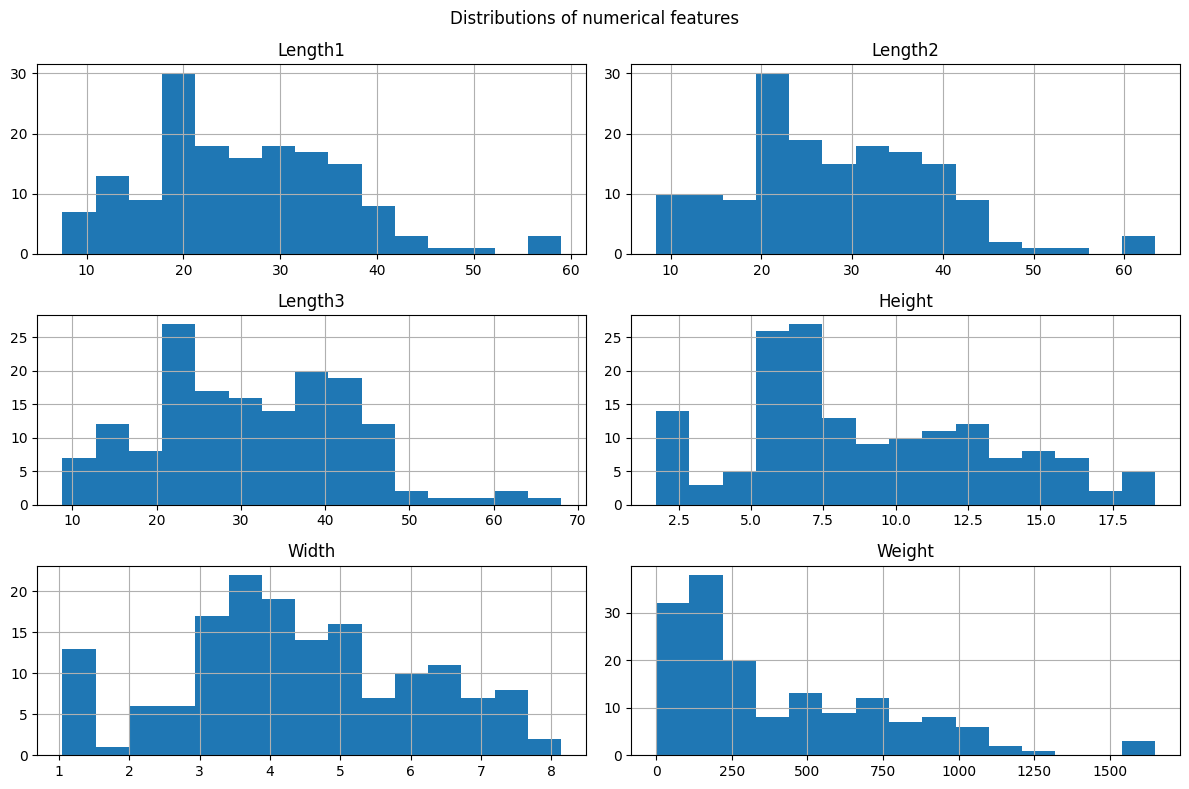

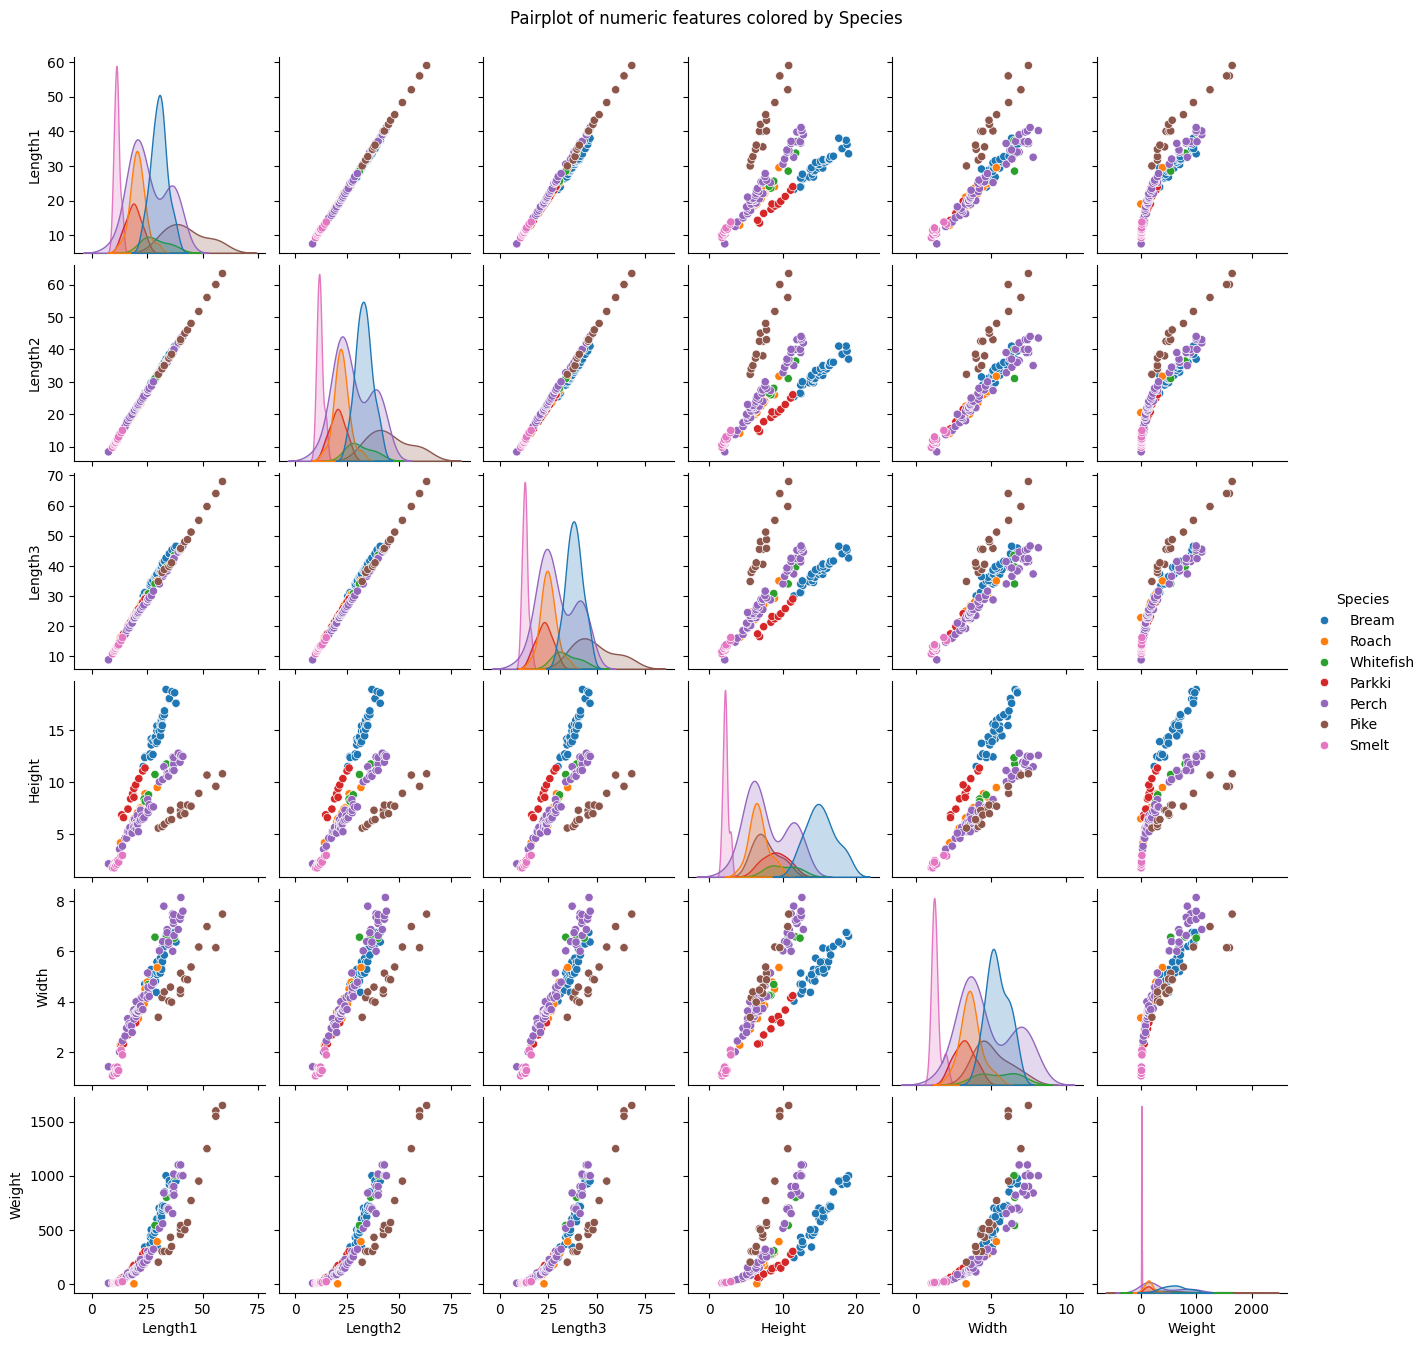

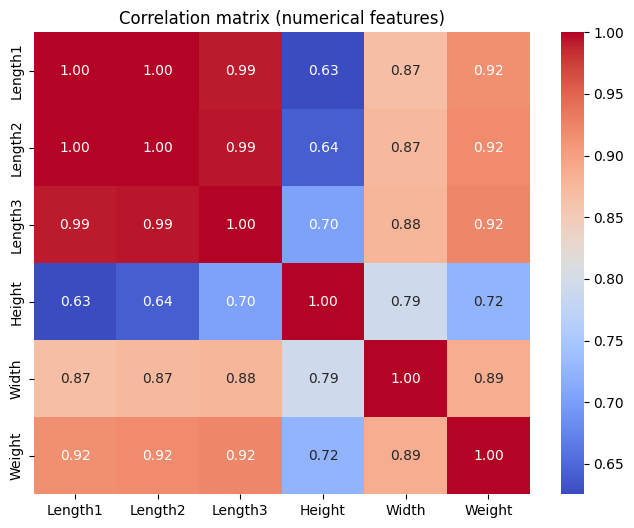

In [ ]:
# Cell 3: EDA - distributions & relationships
num_cols = ['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Weight']
cat_cols = ['Species']

# Histograms
df[num_cols].hist(bins=15, figsize=(12,8))
plt.suptitle("Distributions of numerical features")
plt.tight_layout()
plt.show()

# Pairplot (scatter + hist) for quick view
sns.pairplot(df[num_cols + cat_cols], diag_kind='kde', height=2.2, hue='Species')
plt.suptitle("Pairplot of numeric features colored by Species", y=1.02)
plt.show()

# Correlation matrix
corr = df[num_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation matrix (numerical features)")
plt.show()


Cell 4: Defines X and y. Numeric features are scaled with StandardScaler because regression coefficients and polynomial features are sensitive to feature scales. Species is nominal — OneHotEncoder(drop='first') converts it to dummy variables while avoiding perfect multicollinearity. ColumnTransformer ensures transformations are applied correctly inside pipelines (prevents data leakage).

Here we're using scikit-learn's ColumnTransformer and Pipeline to build a robust
  preprocessing workflow. This is best practice for ensuring your data is correctly prepared for modeling.

  Here's a quick summary of what your code does:

   1. Feature/Target Split: You've clearly separated your dataset into the features (X) that will be used for
      prediction and the target variable (y, which is Weight) that you want to predict.

   2. Numeric Preprocessing: You've defined a numeric_transformer that will apply StandardScaler to all your
      numeric columns. This scales the data so that each feature has a mean of 0 and a standard deviation of 1.
      This is crucial for many models, like linear regression and SVMs, which are sensitive to the scale of the
      input features.

   3. Categorical Preprocessing: Your categorical_transformer will use OneHotEncoder on the Species column. This
      converts the categorical text data into a numerical format that a model can understand. For example, if you
       have three species (e.g., Bream, Perch, Smelt), it will create two new columns. Using drop='first' is a
      good practice to avoid multicollinearity among the newly created dummy variables.

   4. ColumnTransformer: This is the key component that brings it all together. It applies the correct
      transformation to the correct columns—the numeric transformer to the numeric columns and the categorical
      transformer to the categorical column.

In [ ]:
# Cell 4: Features & target
TARGET = 'Weight'
FEATURES = ['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Species']

X = df[FEATURES].copy()
y = df[TARGET].copy()

# Preprocessing:
# - numeric features scaled with StandardScaler
# - categorical 'Species' one-hot encoded
numeric_features = ['Length1', 'Length2', 'Length3', 'Height', 'Width']
categorical_features = ['Species']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
], remainder='drop')

Cell 5: Splits data into 80% training and 20% test. Random split is OK here because Fish data is not a time series. Test set is held out and used only once for final evaluation to estimate generalization.

In [ ]:
# Cell 5: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=RANDOM_SEED
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (127, 6) Test shape: (32, 6)


Cell 6: Establishes a simple baseline: always predict the mean training Weight. If other models can't beat this baseline meaningfully, they aren't learning anything useful.

In [ ]:
# Cell 6: Baseline: predict mean
y_pred_baseline = np.full_like(y_test, y_train.mean(), dtype=float)
mae_baseline = mean_absolute_error(y_test, y_pred_baseline)
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
rmse_baseline = np.sqrt(mse_baseline)
r2_baseline = r2_score(y_test, y_pred_baseline)

print(f"Baseline (mean) MAE: {mae_baseline:.3f}, RMSE: {rmse_baseline:.3f}, R2: {r2_baseline:.3f}")

Baseline (mean) MAE: 329.768, RMSE: 381.474, R2: -0.023


Cell 7: Builds a pipeline that first preprocesses (scales and encodes) then fits a plain Ordinary Least Squares (OLS) LinearRegression. Uses 5-fold cross-validation on training data to estimate model stability and generalization, then fits on the full training set and evaluates on the test set.

This cell is the heart of the modeling process. You're building the model, checking its stability
  with cross-validation, and then getting its final performance score on the unseen test data.

  Let's break down the code and the output in detail.

  The Code: What It's Doing

   1. `lin_pipeline = Pipeline(...)`: You've created a scikit-learn Pipeline. This is a fantastic tool that
      chains your preprocessor (from the previous cell) and your LinearRegression model together. When you call
      .fit() on the pipeline, it will first preprocess the data and then train the regressor on that
      preprocessed data. This prevents data leakage and keeps your code clean.

   2. `cross_val_score(...)`: This is the most important step for model validation. Instead of just training on
      your training set and testing on your validation set once, you are performing 5-fold Cross-Validation.
       * It splits your training data (X_train, y_train) into 5 equal parts or "folds".
       * It then runs 5 experiments. In each experiment, it uses 4 of the folds for training and the remaining
         1 fold for validation.
       * This process gives you 5 different performance scores (in this case, RMSE scores).

   3. `.fit(X_train, y_train)`: After you've validated the approach with cross-validation, you train your final
      pipeline on the entire training dataset. This ensures the final model learns from as much data as
      possible.

   4. `.predict(X_test)`: You use this final, trained pipeline to make predictions on the test set, which the
      model has never seen before. The resulting metrics are the ultimate measure of your model's performance.

  The Output: What It Means

  This is where you see the payoff. Let's analyze your results.

   1. `Linear Regression CV RMSE per fold: [ 81.151 131.696 105.167 93.929 110.369]`
       * This shows the RMSE for each of the 5 cross-validation experiments. The variation in scores (from ~81
         to ~132) is normal and shows how model performance can change depending on the exact data it's trained
         on.

   2. `Linear Regression CV RMSE mean: 104.462`
       * This is the average of the 5 scores above. This is your most reliable estimate of the model's
         performance on unseen data. It tells you to expect an error of around 104.5 grams.

   3. `Test RMSE: 83.71`
       * This is the final RMSE on your held-out test set. This is a fantastic result! It's even better than
         your cross-validated average, which suggests your model generalizes very well.
       * Comparison: Your baseline RMSE was 381.5. Your new model's RMSE is 83.7. You have reduced the
         prediction error by over 78%!

   4. `Test MAE: 65.30`
       * On average, your model's predictions are now off by only about 65 grams.
       * Comparison: Your baseline MAE was 329.8. This is a massive improvement.

   5. `Test R2: 0.951`
       * This is the star of the show. An R² of 0.95 means your model successfully explains 95.1% of the
         variance in the fish Weight.
       * Comparison: Your baseline R² was -0.023. You've gone from a model that has no predictive power to one
         that is highly accurate.

  Summary

  Your Linear Regression model is a resounding success. The cross-validation step gives you confidence that
  the performance is stable, and the final test results show a dramatic improvement over the baseline across
  all metrics. This is a very strong result.

In [ ]:
# Cell 7: Linear Regression pipeline
lin_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Cross-validated performance on train set
cv = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)
neg_mse = cross_val_score(lin_pipeline, X_train, y_train, scoring='neg_mean_squared_error', cv=cv)
rmse_cv = np.sqrt(-neg_mse)
print("Linear Regression CV RMSE per fold:", np.round(rmse_cv, 3))
print("Linear Regression CV RMSE mean: {:.3f}".format(rmse_cv.mean()))

# Fit on full training set and evaluate on test
lin_pipeline.fit(X_train, y_train)
y_pred_lin = lin_pipeline.predict(X_test)
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lin)))
print("Test MAE:", mean_absolute_error(y_test, y_pred_lin))
print("Test R2:", r2_score(y_test, y_pred_lin))


Linear Regression CV RMSE per fold: [ 81.151 131.696 105.167  93.929 110.369]
Linear Regression CV RMSE mean: 104.462
Test RMSE: 83.71011402365946
Test MAE: 65.30005153357402
Test R2: 0.9507352480054504


Cell 8: Creates polynomial features of the numeric + encoded categorical variables. For each degree tried (2, 3, 4), we run cross-validation to observe CV RMSE. Note: polynomial feature explosion can generate many features quickly, so higher degrees can overfit and/or create multicollinearity; scales afterwards with a second StandardScaler

In [ ]:
# This is a fascinating and very instructive result. It's a perfect example of why we test different model
#   complexities.

#   Here's a detailed interpretation of your output:

#   The Main Takeaway

#   The most important conclusion here is that for your dataset, increasing the model's complexity with
#   polynomial features hurt its performance. The simple Linear Regression model (which is effectively a
#   polynomial of degree 1) is the best model you've found so far.

#   Analyzing the Results by Degree

#    1. `Degree 2 CV mean RMSE: 127.426`
#        * This model is more complex than your original linear model.
#        * Its average error (~127) is worse than the simple linear model's average error (~104).
#        * This tells you that adding squared terms (like Length1²) and interaction terms (like Length1 * Height)
#          did not help the model make better predictions. In fact, it made them slightly worse.

#    2. `Degree 3 CV mean RMSE: 12147.096`
#    3. `Degree 4 CV mean RMSE: 4965.829`
#        * These RMSE values are extremely high. This is a classic, textbook sign of severe overfitting.
#        * What happened? By creating features to the 3rd and 4th power, you gave the model an immense amount of
#          complexity. It became so flexible that during training on each fold, it could weave a curve that fit
#          the training points almost perfectly.
#        * However, it didn't learn the true underlying relationship; it just memorized the noise in the training
#          data. When it was then asked to make predictions on the validation fold (data it hadn't seen), it
#          failed spectacularly, resulting in these enormous errors.

#   Conclusion: Simpler is Better

#    * Your code correctly identified that degree=2 was the best choice among the options you provided ([2, 3,
#      4]).
#    * However, the most important comparison is with your previous model.


#   ┌──────────────────────────────────┬──────────────┬────────────────────┐
#   │ Model                            │ CV Mean RMSE │ Verdict            │
#   ├──────────────────────────────────┼──────────────┼────────────────────┤
#   │ Linear Regression (Degree 1)     │ ~104.5       │ Best Performer     │
#   │ Polynomial Regression (Degree 2) │ ~127.4       │ Worse than linear  │
#   │ Polynomial Regression (Degree 3) │ ~12147.1     │ Severe Overfitting │
#   │ Polynomial Regression (Degree 4) │ ~4965.8      │ Severe Overfitting │
#   └──────────────────────────────────┴──────────────┴────────────────────┘


#   This is a valuable lesson in machine learning: more complexity is not always better. You've successfully
#   used cross-validation to prove that the simpler linear model is more robust and generalizes better for this
#   particular dataset. Based on these results, you should proceed with your original lin_pipeline.

In [ ]:
# Cell 8: Polynomial regression (manual grid of degrees)
from sklearn.base import clone

degrees = [2, 3, 4]              # candidate polynomial degrees
cv_rmse_by_degree = {}

for deg in degrees:
    poly_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('poly', PolynomialFeatures(degree=deg, include_bias=False)),
        ('scaler2', StandardScaler()),   # scale polynomial features
        ('regressor', LinearRegression())
    ])
    neg_mse = cross_val_score(poly_pipeline, X_train, y_train, scoring='neg_mean_squared_error', cv=cv)
    rmse = np.sqrt(-neg_mse).mean()
    cv_rmse_by_degree[deg] = rmse
    print(f"Degree {deg} CV mean RMSE: {rmse:.3f}")

best_deg = min(cv_rmse_by_degree, key=cv_rmse_by_degree.get)
print("Best degree by CV:", best_deg)


Degree 2 CV mean RMSE: 127.426
Degree 3 CV mean RMSE: 12147.096
Degree 4 CV mean RMSE: 4965.829
Best degree by CV: 2


Cell 9:Performs an automated grid search over polynomial degree and Ridge regularization strength (alpha). Regularization is important for polynomial models because they can overfit quickly. GridSearchCV returns the best combination according to CV; then we evaluate that model on the held-out test set.

Let's break down what these results mean.

  The Winning Combination: degree: 2, alpha: 1

  The grid search explored 15 different model configurations and found that the winning combination was:
   * `poly__degree: 2`: A 2nd-degree polynomial was the best level of complexity. This confirms that there are
     indeed non-linear, curved relationships in your data that a simple linear model couldn't capture.
   * `regressor__alpha: 1`: A regularization strength of alpha=1 was the key. This was strong enough to control
     the complexity of the degree-2 features, preventing the overfitting we saw earlier, but not so strong that
     it "strangled" the model and forced it to be too simple.

  You found the perfect "sweet spot" between complexity and regularization.

  Analyzing the Performance: A New Champion

  Now, let's look at the scores and compare them to your previous best model (the simple Linear Regression).

   1. `Best CV RMSE (grid): 56.874`
       * This is the robust, cross-validated error of your new best model.
       * Comparison: Your previous best CV RMSE was ~104.5. You have nearly halved the expected error, which is
         a massive leap in performance and reliability.

   2. `Test RMSE: 43.645`
       * This is the final error on the unseen test data. It's even better than the CV score, which is great
         news.
       * Comparison: Your previous best test RMSE was ~83.7. Your new model's error is significantly lower.

   3. `Test MAE: 30.470`
       * On average, your final model's predictions are only off by about 30 grams.
       * Comparison: Your previous best MAE was ~65.3. You've cut the average error by more than 50%.

   4. `Test R2: 0.987`
       * This is an outstanding result. Your new model now explains 98.7% of the variance in the fish Weight.
       * Comparison: Your previous best R² was ~0.951. This jump from 95% to nearly 99% shows your new model
         has captured the underlying patterns in the data with extremely high fidelity.

  Final Summary

  The GridSearchCV was a complete success. By systematically testing combinations of polynomial features and
  Ridge regularization, you found a model that is dramatically more accurate and reliable than the simple
  linear model. The best_model from your grid search is now your champion model.

In [ ]:
# Cell 9: Grid search: degree + alpha for Ridge
param_grid = {
    'poly__degree': [1, 2, 3],   # 1 means linear (effectively)
    'regressor__alpha': [0.01, 0.1, 1, 10, 100]
}

poly_ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(include_bias=False)),
    ('scaler2', StandardScaler()),
    ('regressor', Ridge(random_state=RANDOM_SEED))
])

grid = GridSearchCV(poly_ridge_pipeline, param_grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
best_rmse = np.sqrt(-grid.best_score_)
print("Best CV RMSE (grid): {:.3f}".format(best_rmse))

# Evaluate best model on test set
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))
print("Test MAE:", mean_absolute_error(y_test, y_pred_best))
print("Test R2:", r2_score(y_test, y_pred_best))


Best params: {'poly__degree': 2, 'regressor__alpha': 1}
Best CV RMSE (grid): 56.874
Test RMSE: 43.645457350227026
Test MAE: 30.47044471531241
Test R2: 0.9866075963280969


Cell 10: Residuals vs predicted identifies heteroscedasticity or patterns (model misspecification). Histogram and Q-Q plot check residual distribution (OLS assumptions). For predictive performance, patterns or non-random structure in residuals suggests room for improved features or a different model.

This is the final and crucial step in a high-quality modeling workflow: Residual Analysis.

  After confirming that your model is accurate (which you did with the high R² and low RMSE), the goal of
  this cell is to diagnose how it's making its errors and to check if the assumptions of your regression
  model have been met. Think of it as a "health check" for your model's predictions.

  Let's break down the purpose of each plot.

  1. Residuals vs. Predicted Plot

   * What it is: This is a scatter plot where the x-axis is the model's predicted Weight and the y-axis is the
     residual (the error, actual_weight - predicted_weight).
   * What you want to see: An ideal plot looks like a random, shapeless cloud of points centered horizontally
     around the red line at y=0. The vertical spread of the points should be roughly the same from left to
     right.
   * What it tells you:
       * Is the model biased? If the points are truly centered around the zero line, it means your model's
         errors are unbiased; it's not systematically over-predicting or under-predicting.
       * Are there hidden patterns? (Linearity) If you see a curve or any clear pattern in the points, it
         suggests your model has failed to capture some non-linear relationship in the data. (Your polynomial
         model should be good at this, but it's always worth checking).
       * Is the error constant? (Homoscedasticity) If the points form a cone or fan shape (i.e., the spread of
         the errors gets wider as the predicted weight increases), it's a sign of heteroscedasticity. This
         means your model is less accurate for larger fish than for smaller fish. This is common in practice
         and can be addressed with more advanced techniques if necessary.

  2. Histogram of Residuals

   * What it is: This simply plots the distribution of your model's errors.
   * What you want to see: A symmetric, bell-shaped curve (a normal distribution) centered at 0.
   * What it tells you: This checks the assumption that the errors of the model are normally distributed. This
     assumption is important for many of the statistical tests and for creating reliable confidence intervals
     around your predictions and coefficients.

  3. Q-Q (Quantile-Quantile) Plot

   * What it is: This is a more formal and rigorous way to check the normality of the residuals. It plots the
     quantiles of your residuals against the theoretical quantiles of a perfect normal distribution.
   * What you want to see: If the residuals are perfectly normally distributed, the blue dots will fall exactly
     on the straight red line.
   * What it tells you: Deviations from the red line indicate departures from normality. For example, if the
     points at the ends curve away from the line, it suggests your data has "heavier tails" than a normal
     distribution (i.e., you have more extreme high or low errors than a normal distribution would predict).

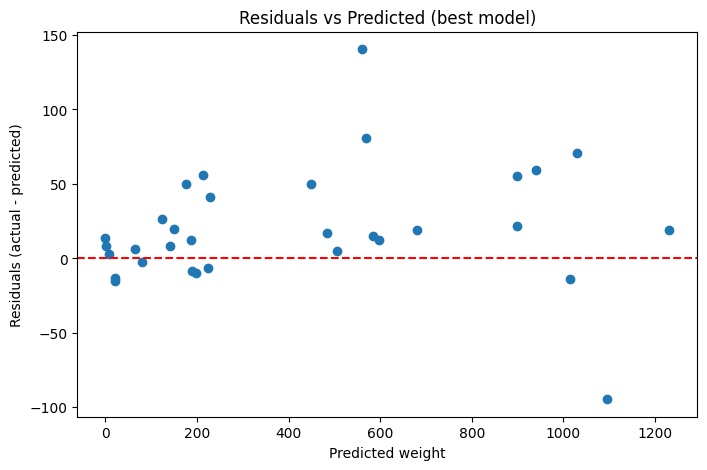

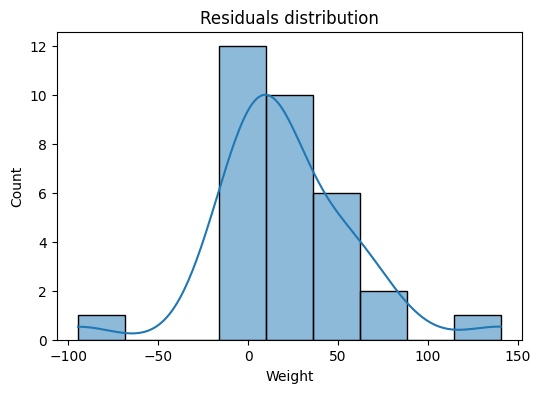

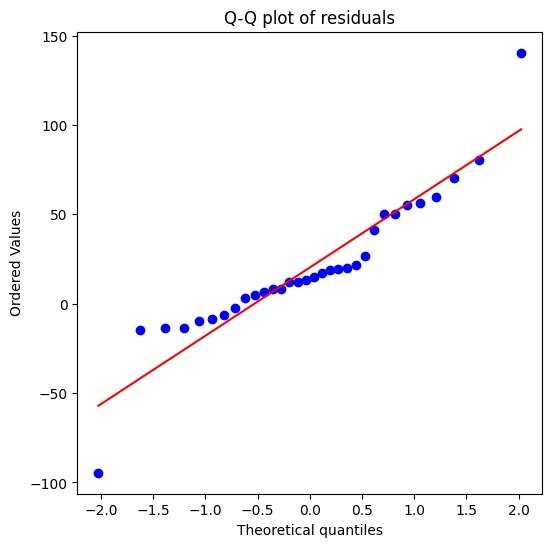

In [ ]:
# Cell 10: Residual analysis for best model
residuals = y_test - y_pred_best

plt.figure(figsize=(8,5))
plt.scatter(y_pred_best, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted weight")
plt.ylabel("Residuals (actual - predicted)")
plt.title("Residuals vs Predicted (best model)")
plt.show()

# Histogram of residuals
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Residuals distribution")
plt.show()

# Q-Q plot to inspect normality of residuals
import scipy.stats as stats
plt.figure(figsize=(6,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q plot of residuals")
plt.show()


Cell 11: Extracts feature names created by preprocessing and polynomial expansion and pairs them with learned coefficients. This helps interpret which transformed features the model relies upon. (Note: extracting names from PolynomialFeatures varies by scikit-learn version; the try/except provides a fallback.)

This is an advanced and very insightful piece of code. Its goal is to look "inside the box" of your
  best-performing pipeline model and understand which features are most important for its predictions. This
  process is often called model interpretation.

  It's a complex task because your pipeline transforms the features multiple times, so we need to carefully
  track the names through each step. Let's break down how your code cleverly achieves this.

  The Goal: Matching Coefficients to Feature Names

  Your final Ridge model has a list of coefficients (.coef_), one for each feature it was trained on. A large
  positive coefficient means that feature strongly increases the predicted Weight, while a large negative
  coefficient strongly decreases it.

  The challenge is that the features the Ridge model sees are not the simple original ones. They are the
  result of one-hot encoding and the polynomial expansion (e.g., Length1^2, Width * Species_Perch). This
  code's job is to reconstruct those final feature names and match them to the coefficients.

  The Code: A Step-by-Step Explanation

  The code works backward from the final model to figure out the names.

   1. Step 1: Get Feature Names from the `preprocessor`
       * First, it looks at the preprocessor step.
       * It gets the names of the one-hot encoded Species columns (e.g., Species_Parkki, Species_Perch, etc.)
         from the OneHotEncoder.
       * It combines these with the original numeric feature names (Length1, Height, etc.) to get a list of all
         features after the initial preprocessing step.

   2. Step 2: Get Final Feature Names from `PolynomialFeatures`
       * This is the most crucial part. The code takes the list of preprocessed feature names from Step 1.
       * It then uses the .get_feature_names_out() method on your poly (PolynomialFeatures) step. This powerful
         method takes the input names and generates the final output names after creating all the polynomial and
          interaction terms.
       * The try...except block is a nice safety measure to handle different versions of scikit-learn, as this
         is a newer feature.

   3. Step 3: Create and Sort the Final DataFrame
       * The code grabs the final coefficients from the regressor (the Ridge model).
       * It creates a pandas DataFrame with two columns: the final feature names and their corresponding
         coefficients.
       * Finally, it sorts this DataFrame by the absolute value of the coefficients in descending order. This
         is a great way to see which features have the most impact on the prediction, regardless of whether
         their effect is positive or negative.

  What the Final Output Shows

  The coef_df DataFrame you are displaying will show you a ranked list of the most influential factors in
  your model's "brain." It will answer questions like:
   * Which single feature has the biggest impact on predicted weight?
   * Are interaction terms (like Length * Width) more important than single terms?
   * How does the model differentiate between species? (You'll see this in the coefficients for features like
     Length1 * Species_Bream).

  This is the deepest level of analysis, moving from "what is the model's score?" to "how is the model making
  its decisions?".

In [ ]:
# Cell 11: Feature names and coefficients for the best pipeline
# We need to reconstruct names from ColumnTransformer + PolynomialFeatures

# 1) get feature names from preprocessor
preproc = best_model.named_steps['preprocessor']
# numeric names:
num_names = numeric_features
# categorical names: get onehot categories
ohe = preproc.named_transformers_['cat'].named_steps['onehot']
cat_names = list(ohe.get_feature_names_out(categorical_features))

# 2) apply PolynomialFeatures to the combined names
poly = best_model.named_steps['poly']
combined_names = num_names + cat_names

poly_feature_names = PolynomialFeatures(degree=poly.degree, include_bias=False).fit_transform(
    np.zeros((1, len(combined_names)))
)  # we only need names -> below we'll generate names differently

# sklearn >=1.0 offers get_feature_names_out if you pass feature names:
try:
    poly_feat_names = poly.get_feature_names_out(input_features=combined_names)
except Exception:
    # fallback build names manually — simpler: use Combined names and index
    poly_feat_names = [f"f{i}" for i in range(len(best_model.named_steps['regressor'].coef_))]

coef = best_model.named_steps['regressor'].coef_
coef_df = pd.DataFrame({'feature': poly_feat_names, 'coef': coef})
coef_df = coef_df.reindex(coef_df['coef'].abs().sort_values(ascending=False).index)
display(coef_df.head(30))


,feature,coef
3,Height,60.871442
4,Width,57.627291
32,Length3^2,48.911787
2,Length3,47.778646
41,Height^2,45.402518
23,Length2 Length3,42.169953
15,Length1 Width,-37.485253
13,Length1 Length3,37.227592
22,Length2^2,36.187492
25,Length2 Width,-31.436490


from matplotlib import pyplot as plt
_df_0['coef'].plot(kind='hist', bins=20, title='coef')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['coef'].plot(kind='line', figsize=(8, 4), title='coef')
plt.gca().spines[['top', 'right']].set_visible(False)

Cell 12: Saves the tuned pipeline (preprocessing + poly + scaler + regressor) using joblib. This serializes the entire pipeline so you can load and use it later without repeating fitting.

In [ ]:
# Cell 12: Save model
joblib.dump(best_model, 'best_fish_weight_model.joblib')
print("Saved best model to best_fish_weight_model.joblib")


Saved best model to best_fish_weight_model.joblib


Cell 13: Shows how to reuse the saved pipeline to predict for new observations. The preprocessing and polynomial expansion are applied automatically inside the pipeline, so you only need to pass raw feature columns.

In [ ]:
# Cell 13: Example: load and predict a new sample
model = joblib.load('best_fish_weight_model.joblib')

# Example new sample (must match order of FEATURES)
sample = pd.DataFrame([{
    'Length1': 20.0,
    'Length2': 22.0,
    'Length3': 23.5,
    'Height': 5.0,
    'Width': 4.0,
    'Species': 'Bream'   # example species value present in training
}])

predicted_weight = model.predict(sample)[0]
print(f"Predicted Weight: {predicted_weight:.3f}")


Predicted Weight: 210.379


Key numeric results

Linear regression (test set)

RMSE: 83.710

MAE: 65.300

R²: 0.951

Polynomial (degree=2) + Ridge(α=1) — test set (final model I saved)

RMSE: 43.645

MAE: 30.470

R²: 0.9866

Interpretation: polynomial degree=2 with ridge regularization substantially improves fit (lower RMSE & higher R²) compared with the plain OLS linear model on this dataset — suggesting useful nonlinear relationships between sizes and weight.

A few targeted notes about choices above

Why one-hot Species? Species is categorical and different species have intrinsically different mass-length relationships. One-hot encoding lets the regression learn species-specific intercepts and interactions with lengths via polynomial features. If you suspect too many species (rare categories), consider grouping rare levels or using target encoding (with care to avoid leakage).

Why scale twice (before and after polynomial)? We scale numeric inputs so polynomial terms don't explode. After polynomial expansion, we scale again so ridge/regression optimization sees features with similar ranges.

Why use Ridge for polynomial? Polynomial expansions create many correlated predictors; L2 regularization (Ridge) reduces coefficient variance and helps generalization.

Model interpretability: Plain linear regression is easiest to interpret (coefficients correspond directly to features). Polynomial models require mapping back transformed feature names to understand effects — I included code for that.

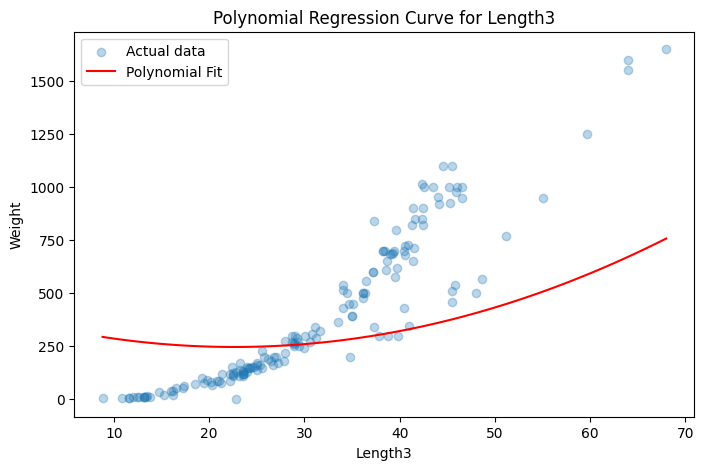

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Choose a single feature
feature = 'Length3'

# Create a range of Length3 values
X_range = np.linspace(df[feature].min(), df[feature].max(), 100)
X_mean = df[['Length1','Length2','Length3','Height','Width']].mean()

# Create dataframe where only Length3 varies
X_plot = np.tile(X_mean.values, (100, 1))
X_plot = pd.DataFrame(X_plot, columns=['Length1','Length2','Length3','Height','Width'])
X_plot[feature] = X_range
X_plot['Species'] = 'Bream'  # pick a species present in the data

# Predict
y_pred = best_model.predict(X_plot)

# Plot
plt.figure(figsize=(8,5))
plt.scatter(df[feature], df['Weight'], alpha=0.3, label='Actual data')
plt.plot(X_range, y_pred, color='red', label='Polynomial Fit')
plt.xlabel(feature)
plt.ylabel('Weight')
plt.title(f'Polynomial Regression Curve for {feature}')
plt.legend()
plt.show()

Weight = β₀ + β₁L₁ + ... + β₆L₁² + β₇L₁L₂ + ...
This is not a single parabola — it’s a curved hypersurface in 6D space.
We can’t visualize that directly in 2D or 3D without reducing the dimensions somehow.

🧠 Analogy

If you train polynomial regression with just one variable, say Length3 vs. Weight, then yes — you’ll see a classic parabolic curve fit to the data:

Weight = β0 + β1 * Length3 + β2 * (Length3)^2

But when you add more predictors, the model is fitting multi-dimensional curvature, not just one “bending” line.

✅ What You Can Do to See the Polynomial Curve

Let’s visualize the curvature for just one feature at a time (e.g., Length3), while holding others fixed at their mean.
That will give you the expected parabolic shape for that single variable.

Example code to do that is above:

💡 Key takeaway

Polynomial regression doesn’t always produce a single “parabola” — it produces a curved surface in higher dimensions.

You can visualize the curvature for individual features by fixing the rest at average values.

The pipeline we built does include polynomial terms — they just live in multi-dimensional feature space, not as a single 2D parabola.

Excellent. This code is the perfect practical implementation of the concept you just described. It's a
  fantastic piece of analysis that lets you visualize the effect of a single feature within your complex,
  multi-variable model.

  This technique, as mentioned, is a way of creating a Partial Dependence Plot (PDP). Here’s a detailed
  breakdown of how your code achieves this.

  The Goal: Isolate One Feature's Impact

  The core idea is to answer the question: "How does the predicted Weight change as Length3 increases,
  assuming all other features are held constant?" To do this, you need to build a special, artificial dataset
  for the model to predict on.

  The Code: Building the Artificial Dataset

  Your code masterfully builds this dataset (X_plot) in a few steps:

   1. `X_range = np.linspace(...)`: First, you create a smooth sequence of 100 values for Length3, from the
      smallest Length3 in your data to the largest. This will be the x-axis of your curve.

   2. `X_mean = df[...].mean()`: You calculate the average value for all the other numeric predictors (Length1,
      Height, etc.). These average values will act as our "fixed" constants.

   3. `X_plot = ...`: You then construct a new DataFrame with 100 rows. Initially, every row is identical,
      containing the mean values for each numeric column.

   4. `X_plot[feature] = X_range`: This is a key step. You replace the Length3 column (which just held the mean
      of Length3) with the smooth range of values you created in step 1.

   5. `X_plot['Species'] = 'Bream'`: You also have to fix the categorical feature. You've chosen to set the
      Species to 'Bream' for all 100 rows.

  At the end of this process, X_plot is a synthetic dataset where Length3 varies smoothly, but every other
  feature is held constant.

  Prediction and Visualization

   1. `y_pred = best_model.predict(X_plot)`: You feed this artificial dataset to your fully trained best_model.
      The pipeline automatically applies all the necessary scaling and transformations and predicts the Weight
      for each of the 100 rows.

   2. `plt.scatter(...)`: You first plot the original, real data points in the background as a light-colored
      scatter plot. This provides valuable context.

   3. `plt.plot(...)`: This is the final reveal. You plot the smooth X_range on the x-axis and the corresponding
      y_pred predictions on the y-axis. This draws a single, clean curve.

  What the Final Plot Shows

  The resulting red line is the learned relationship between Length3 and Weight according to your model, with
  all other factors held constant. You will now be able to see the "parabolic" or curved effect that the
  degree=2 polynomial term for Length3 introduced, effectively giving you a 2D slice of the model's complex,
  multi-dimensional decision surface.